# RIDGE AND LASSO VISUALIZATIONS

In [27]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge,Lasso,LinearRegression,SGDRegressor,ElasticNet
from sklearn.datasets import make_regression
%matplotlib inline

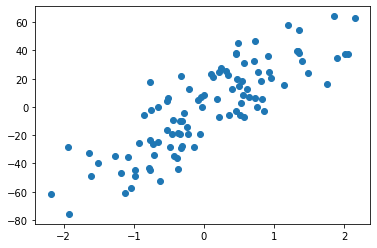

In [12]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
L = LinearRegression()
Las = Lasso()
R  = Ridge()
S = SGDRegressor()
E = ElasticNet(l1_ratio=0.9)

In [29]:
## Linear Regression
L.fit(X_train,y_train)
print(L.coef_,L.intercept_)
print(r2_score(y_test,L.predict(X_test)))

[28.34627527] -3.44862740472613
0.5652760158412893


In [57]:
## Ridge Regression
R.fit(X_train,y_train)
print(R.coef_,R.intercept_)
print(r2_score(y_test,R.predict(X_test)))

[27.96857573] -3.432435334390701
0.5679079415149753


In [18]:
## Lasso Regression
Las.fit(X_train,y_train)
print(Las.coef_,Las.intercept_)
print(r2_score(y_test,Las.predict(X_test)))

[27.68361174] -1.9604625834326774
0.6455395993829757


In [20]:
## Stochastic Gradient Descent Regressor
S.fit(X_train,y_train)
print(S.coef_,S.intercept_)
print(r2_score(y_test,S.predict(X_test)))

[25.25016646] [-2.89566376]
0.7872917551159739


In [26]:
## ElasticNet Regression
E.fit(X_train,y_train)
print(E.coef_,E.intercept_)
print(r2_score(y_test,E.predict(X_test)))

[24.70494769] -3.292522813968412
0.5776513932655055


C:\Users\sajal\AppData\Local\Temp\ipykernel_996\1441186679.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  Las.fit(X_train,y_train)
C:\Users\sajal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sajal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+04, tolerance: 6.462e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


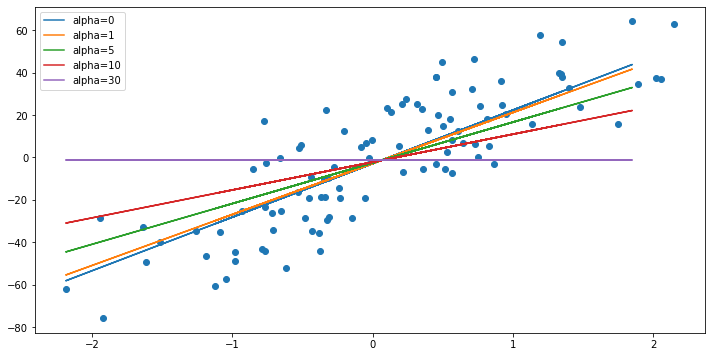

In [21]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    Las = Lasso(alpha=i)
    Las.fit(X_train,y_train)
    plt.plot(X_test,Las.predict(X_test),label=f'alpha={i}')
plt.legend()
plt.show()

In [58]:
mean_squared_error(y_test,R.predict(X_test))

253.21066830145287

In [64]:
def MSE(X_train,y_train,alpha,m,pow):
    if pow == 2:
        return np.sum((y_train - m*X_train -2.89)**2) + alpha*m**pow
        
    else:
        return np.sum((y_train - m*X_train -2.89)**2) + alpha*abs(m)
    

In [91]:
n=np.linspace(-5,5,11)
n

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [103]:
m

array([-100.        ,  -97.97979798,  -95.95959596,  -93.93939394,
        -91.91919192,  -89.8989899 ,  -87.87878788,  -85.85858586,
        -83.83838384,  -81.81818182,  -79.7979798 ,  -77.77777778,
        -75.75757576,  -73.73737374,  -71.71717172,  -69.6969697 ,
        -67.67676768,  -65.65656566,  -63.63636364,  -61.61616162,
        -59.5959596 ,  -57.57575758,  -55.55555556,  -53.53535354,
        -51.51515152,  -49.49494949,  -47.47474747,  -45.45454545,
        -43.43434343,  -41.41414141,  -39.39393939,  -37.37373737,
        -35.35353535,  -33.33333333,  -31.31313131,  -29.29292929,
        -27.27272727,  -25.25252525,  -23.23232323,  -21.21212121,
        -19.19191919,  -17.17171717,  -15.15151515,  -13.13131313,
        -11.11111111,   -9.09090909,   -7.07070707,   -5.05050505,
         -3.03030303,   -1.01010101,    1.01010101,    3.03030303,
          5.05050505,    7.07070707,    9.09090909,   11.11111111,
         13.13131313,   15.15151515,   17.17171717,   19.19191

Text(0, 0.5, 'Loss function value')

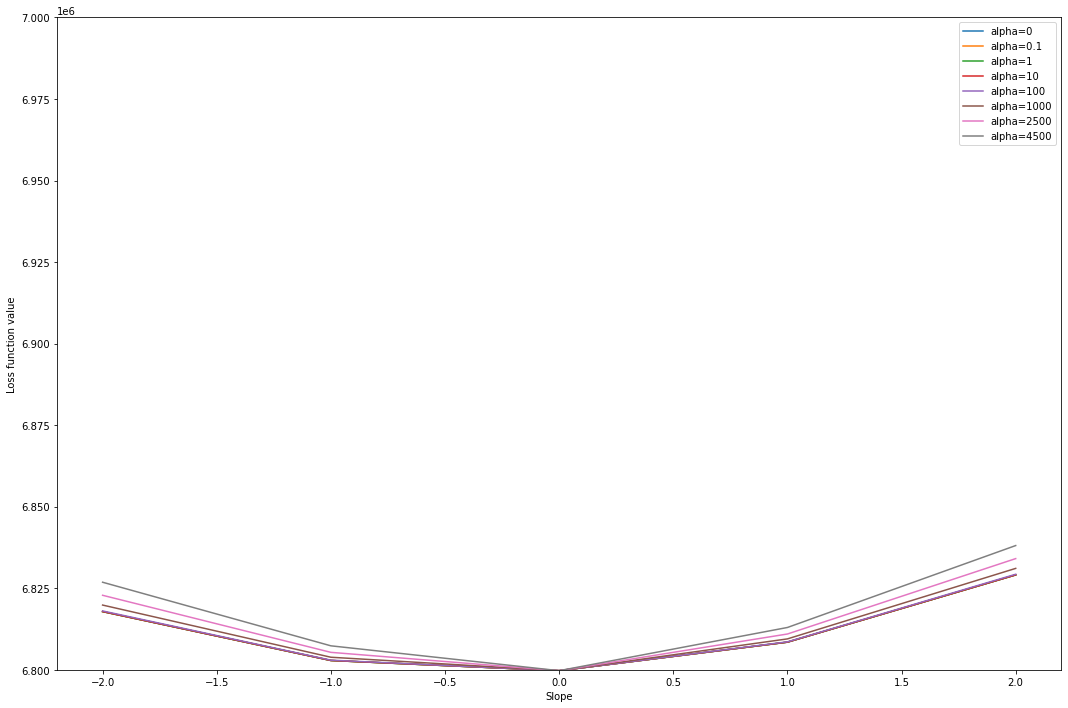

In [112]:
n=np.linspace(-2,2,5)
plt.figure(figsize=(18,12))
alphas=[0,0.1,1,10,100,1000,2500,4500]
for i in alphas:
    loss_list = []
    for k in range(n.shape[0]):
        loss_list.append(MSE(X_train,y_train,m=n[k],alpha=i,pow=1))
#     print(loss_list)    
    plt.plot(n,loss_list,label=f"alpha={i}")
    plt.ylim(6800000,7000000)
plt.legend()
plt.xlabel("Slope")
plt.ylabel("Loss function value")
    
    
    
    

In [43]:
np.sum(y_train - 10*X_train -2.89) + 0.1*10**2

-35523.55625368808